#  J. KRISHNA VAMSI

# WORLD FOOD FEED PRODUCTION ANALYSIS - USING GRAPHS IN PANDAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as gr

In [3]:
df = pd.read_csv("FAO.csv",encoding='latin-1')
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df.shape

(21477, 63)

In [5]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


# CHECKING FOR NULL VALUES

In [6]:
df.isnull().sum()

Area Abbreviation       0
Area Code               0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Unit                    0
latitude                0
longitude               0
Y1961                3539
Y1962                3539
Y1963                3539
Y1964                3539
Y1965                3539
Y1966                3539
Y1967                3539
Y1968                3539
Y1969                3539
Y1970                3539
Y1971                3539
Y1972                3539
Y1973                3539
Y1974                3539
Y1975                3539
Y1976                3539
Y1977                3539
Y1978                3539
Y1979                3539
Y1980                3539
                     ... 
Y1984                3539
Y1985                3539
Y1986                3539
Y1987                3539
Y1988                3539
Y1989                3539
Y1990                3415
Y1991       

# DROPPING ALL THE NULL VALUES. Removed Countries Like Corotia, Sundan since no values for records have been found

In [7]:
data=df.dropna()

In [8]:
print(data.isnull().sum())
print(data.shape)

Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Unit                 0
latitude             0
longitude            0
Y1961                0
Y1962                0
Y1963                0
Y1964                0
Y1965                0
Y1966                0
Y1967                0
Y1968                0
Y1969                0
Y1970                0
Y1971                0
Y1972                0
Y1973                0
Y1974                0
Y1975                0
Y1976                0
Y1977                0
Y1978                0
Y1979                0
Y1980                0
                    ..
Y1984                0
Y1985                0
Y1986                0
Y1987                0
Y1988                0
Y1989                0
Y1990                0
Y1991                0
Y1992                0
Y1993                0
Y1994                0
Y1995                0
Y1996      

In [9]:
print("The Food Feed analysis is being done for {} countries.\n".format(len(data.Area.unique())))


The Food Feed analysis is being done for 146 countries.



### UNIVARIATE ANALYSIS

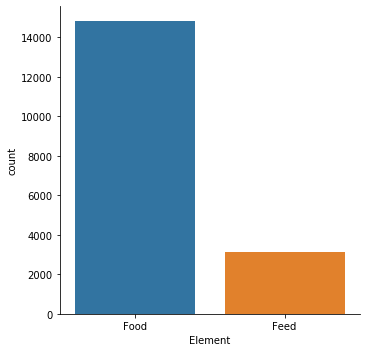

In [11]:
sns.catplot('Element', data = data, kind = 'count');

#### Adding a new Attribute "total" which is the sum of all years production

In [12]:
data['total'] = (data['Y1961'] + data['Y1962'] + data['Y1963'] + data['Y1964'] + data['Y1965'] + data['Y1966'] + 
    data['Y1967'] + data['Y1968'] + data['Y1969'] + data['Y1970'] + data['Y1971'] + data['Y1972'] + data['Y1973'] +
    data['Y1974'] + data['Y1975'] + data['Y1976'] + data['Y1977'] + data['Y1978'] + data['Y1979'] + data['Y1980'] + 
    data['Y1981'] + data['Y1982'] + data['Y1983'] + data['Y1984'] + data['Y1985'] + data['Y1986'] + data['Y1987'] + 
    data['Y1988'] + data['Y1989'] + data['Y1990'] + data['Y1991'] + data['Y1992'] + data['Y1993'] + data['Y1994'] + 
    data['Y1995'] + data['Y1996'] + data['Y1997'] + data['Y1998'] + data['Y1999'] + data['Y2000'] + data['Y2001'] + 
    data['Y2001'] + data['Y2002'] + data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )
print(data.shape)

(17938, 64)


c:\users\lenovo\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Plotting of Mean, 1961, 2013 production values to analyse the variations

In [13]:
# PLACING THE CURSOR ON A COUNTRY WILL SHOW THE VALUE.

df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['total'].agg('mean')

trace = gr.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'YlOrRd',
    z = df2.values
)
df3 = [trace]
layout = gr.Layout(
   title = 'Mean Production in Differet Parts of World')

fig = gr.Figure(data = df3, layout = layout)
iplot(fig)

In [14]:
# PLACING THE CURSOR ON A COUNTRY WILL SHOW THE VALUE.

df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y1961'].agg('mean')

trace = gr.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Portland',
    z = df2.values
)
df3 = [trace]
layout = gr.Layout(
    title = 'Mean Production in 1961 in Differet Parts of World')

fig = gr.Figure(data = df3, layout = layout)
iplot(fig)

In [15]:
# WE HAVE USED THE FUNCTIONS TO GET THE VALUES RATHER THAN PLOTTING TO COVER ALL THE FUNCTIONALITIES

# To get the top 20 food/feed production for Y2013
top = data.nlargest(50, 'Y2013')
top

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
4249,CHN,41,"China, mainland",2918,Vegetables,5142,Food,1000 tonnes,35.86,104.20,...,373694.0,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299,9373964.0
4186,CHN,41,"China, mainland",2605,"Vegetables, Other",5142,Food,1000 tonnes,35.86,104.20,...,330278.0,343450.0,355019.0,373622.0,377460.0,393516.0,402338.0,419262,426850,8255503.0
4237,CHN,41,"China, mainland",2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,35.86,104.20,...,202337.0,202349.0,200735.0,203218.0,201290.0,204167.0,208701.0,207802,209038,8885265.0
4236,CHN,41,"China, mainland",2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,35.86,104.20,...,110316.0,111576.0,115518.0,126518.0,131336.0,143443.0,166554.0,181259,193043,4196823.0
9139,IND,100,India,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,20.59,78.96,...,167463.0,172010.0,177260.0,181605.0,179175.0,184552.0,184648.0,181267,185884,6841173.0
4126,CHN,41,"China, mainland",2514,Maize and products,5521,Feed,1000 tonnes,35.86,104.20,...,94500.0,92500.0,95500.0,106000.0,105600.0,114500.0,125000.0,140000,150000,3303608.0
20506,USA,231,United States of America,2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,37.09,-95.71,...,166631.0,150006.0,156304.0,146098.0,141625.0,131633.0,124808.0,125012,140096,7572790.0
4250,CHN,41,"China, mainland",2919,Fruits - Excluding Wine,5142,Food,1000 tonnes,35.86,104.20,...,76285.0,81520.0,86208.0,91401.0,98779.0,104835.0,114968.0,126174,130129,1790911.0
20399,USA,231,United States of America,2514,Maize and products,5521,Feed,1000 tonnes,37.09,-95.71,...,155323.0,140719.0,148787.0,131619.0,130193.0,121902.0,115739.0,109607,128024,6216683.0
9151,IND,100,India,2918,Vegetables,5142,Food,1000 tonnes,20.59,78.96,...,65549.0,74760.0,80659.0,83421.0,82568.0,91969.0,98339.0,104773,111082,2572232.0


In [16]:
low = data.nsmallest(30, 'Y2013')
low

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
10082,JPN,110,Japan,2516,Oats,5142,Food,1000 tonnes,36.20,138.25,...,44.0,42.0,47.0,46.0,47.0,47.0,51.0,-169,-246,613.0
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
10,AFG,2,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,199.0
17,AFG,2,Afghanistan,2560,Coconuts - Incl Copra,5142,Food,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
21,AFG,2,Afghanistan,2572,Groundnut Oil,5142,Food,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
29,AFG,2,Afghanistan,2601,Tomatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0,0,17.0
35,AFG,2,Afghanistan,2618,Pineapples and products,5142,Food,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
39,AFG,2,Afghanistan,2630,Coffee and products,5142,Food,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0
42,AFG,2,Afghanistan,2640,Pepper,5142,Food,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
44,AFG,2,Afghanistan,2655,Wine,5142,Food,1000 tonnes,33.94,67.71,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,2.0


## COUNTRIES STANDING AS TOP PRODUCERS

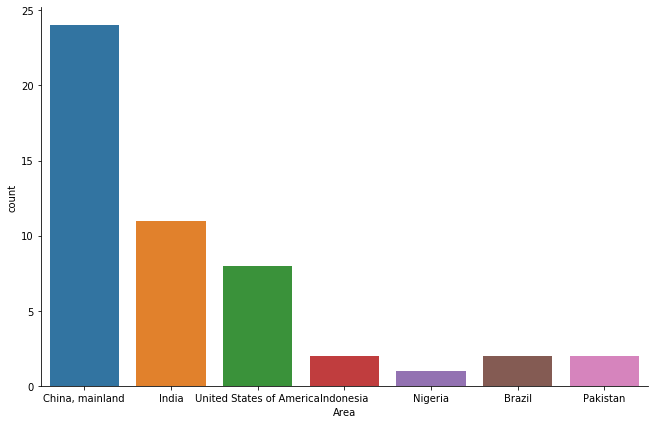

In [18]:
sns.catplot(x= 'Area',data = top, kind ='count', height = 6, aspect = 1.5);

## PLOTTING THE IMPORVEMENT  OF TOP 4 COUNTRIES (India, China, USA, Brazil)

Text(0.5, 1.0, "Brazil's Growth")

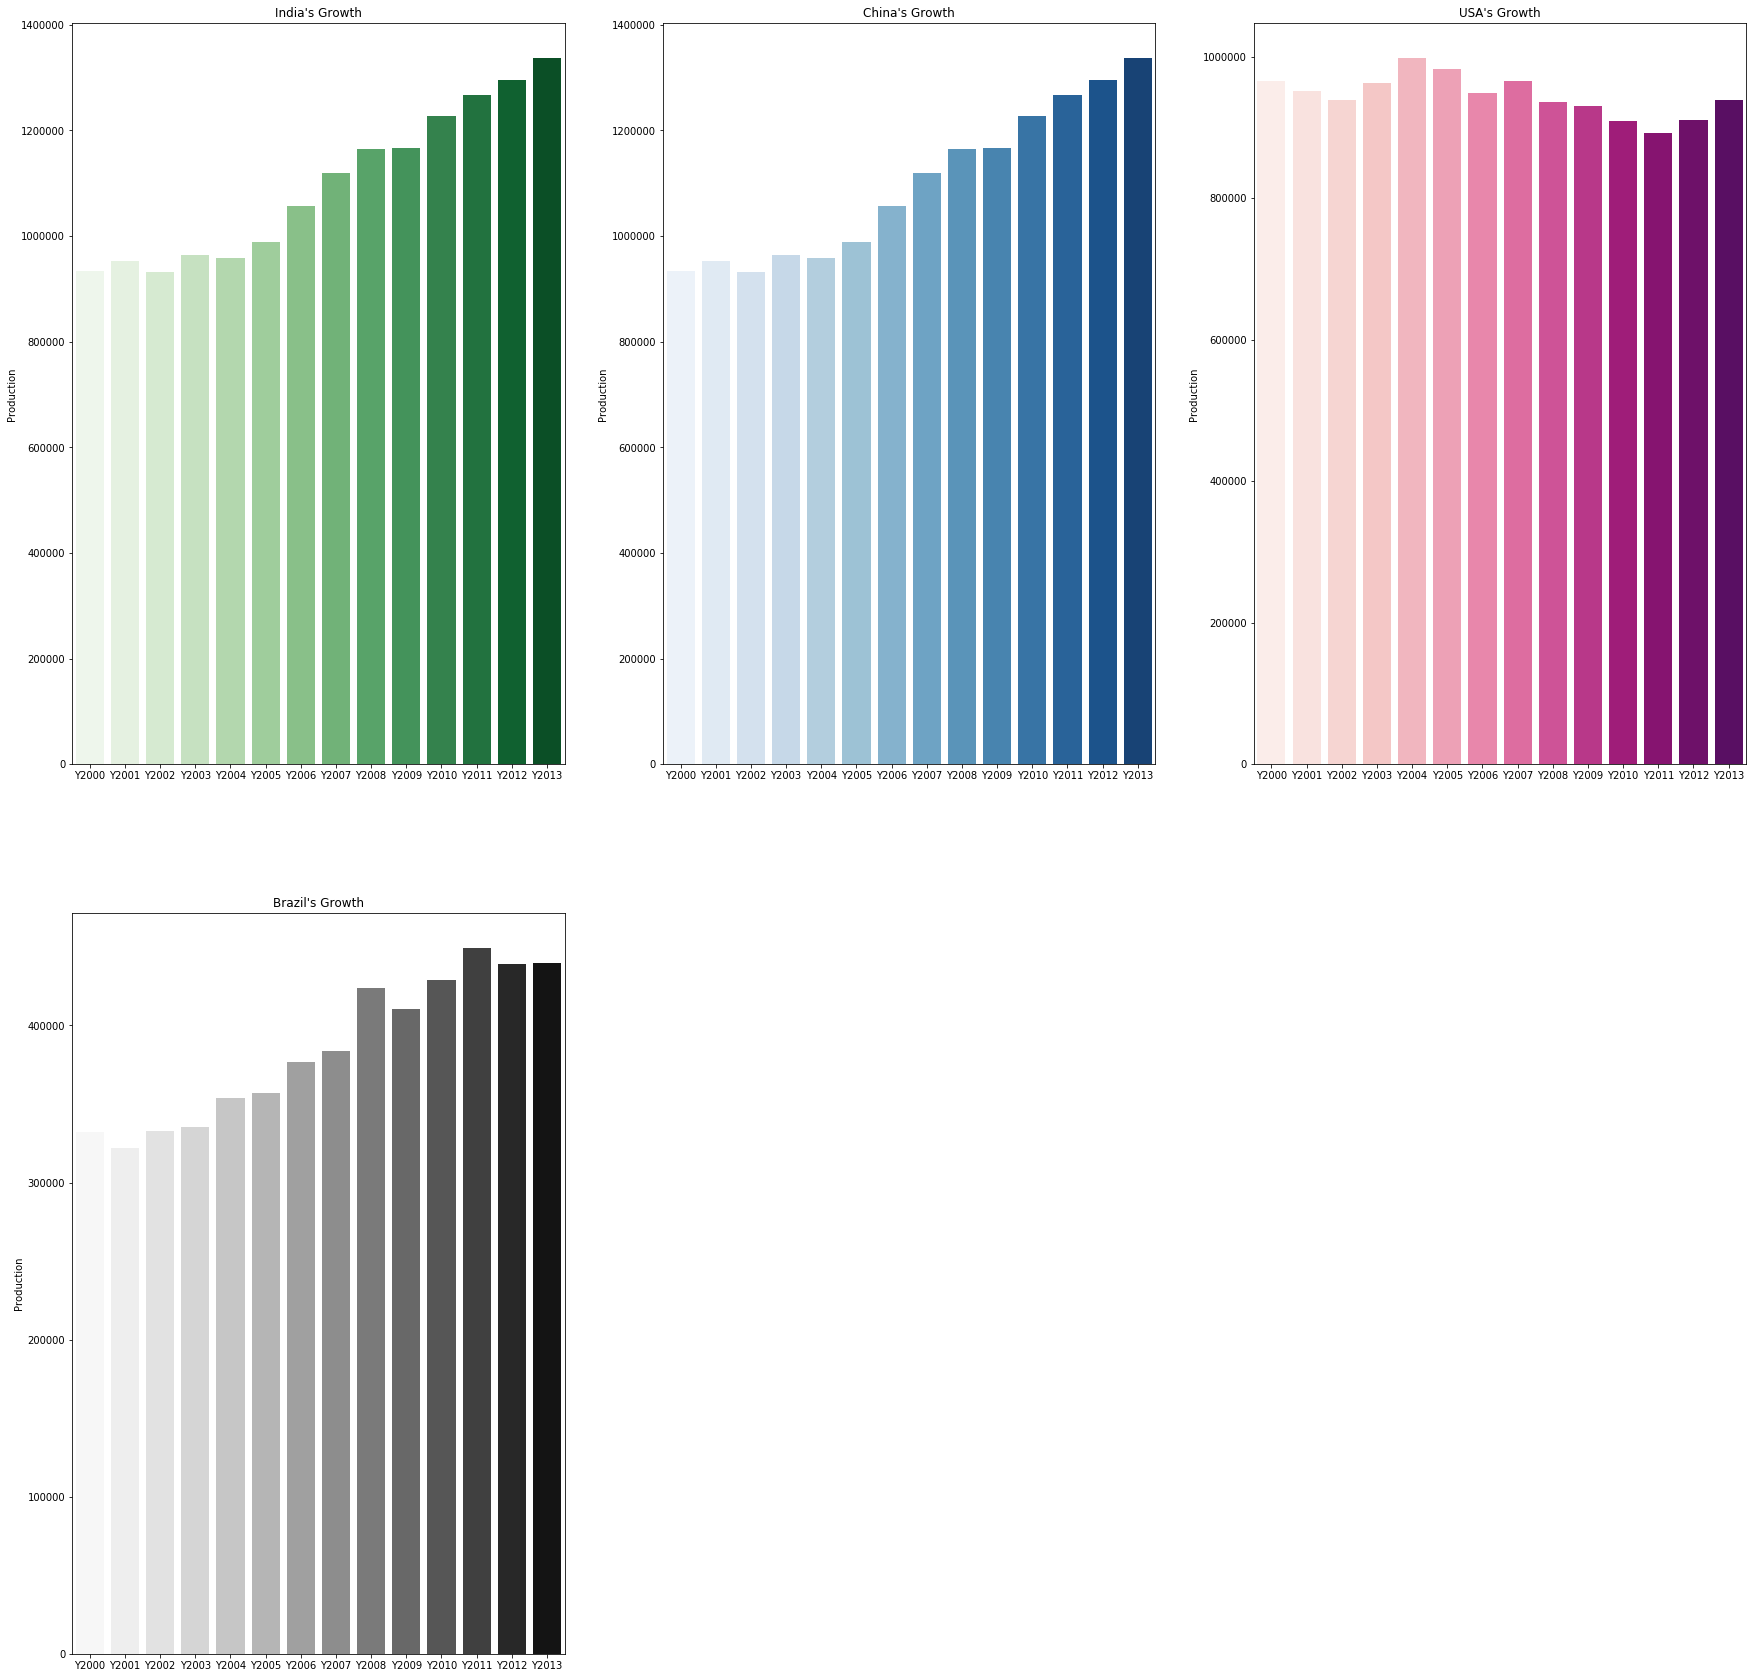

In [19]:
plt.rcParams['figure.figsize'] = (30, 30)
# looking at India's Growth
india_production = pd.DataFrame(data[data['Area'] == 'India'].loc[:, "Y2000": "Y2013"].agg("sum", axis = 0))

india_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = india_production.index, y = india_production.Production, data = india_production, palette = 'Greens')
plt.gca().set_title("India's Growth")

# looking at china's growth
china_production = pd.DataFrame(data[data['Area'] == 'China, mainland'].loc[:, "Y2000":"Y2013"].agg("sum", axis = 0))

china_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = china_production.index, y = india_production.Production, data = china_production, palette = 'Blues')
plt.gca().set_title("China's Growth")

#looking at usa's growth
usa_production = pd.DataFrame(data[data['Area'] == 'United States of America'].loc[:,"Y2000":"Y2013"].agg("sum", axis = 0))

usa_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = usa_production.index, y = usa_production.Production, data = usa_production, palette = 'RdPu')
plt.gca().set_title("USA's Growth")

#looking at brazil's growth
brazil_production = pd.DataFrame(data[data['Area'] == 'Brazil'].loc[:,"Y2000":"Y2013"].agg("sum", axis = 0))

brazil_production.columns = ['Production']
plt.subplot(234)
sns.barplot(x = brazil_production.index, y = brazil_production.Production, data = brazil_production, palette = 'Greys')
plt.gca().set_title("Brazil's Growth")


## Countries with LEAST PRODUCTION

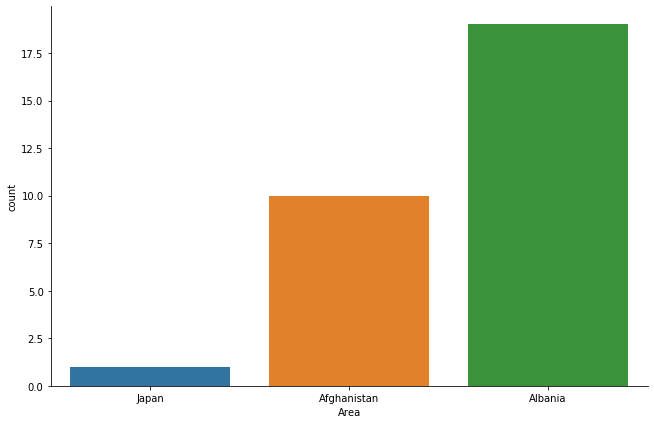

In [20]:
sns.catplot(x= 'Area', data = low, kind ='count', height = 6, aspect = 1.5);

# GROWTH OF COUNTRIES --> LESS DIVERSITY IN PRODUCTION

Text(0.5, 1.0, "Albania's Growth")

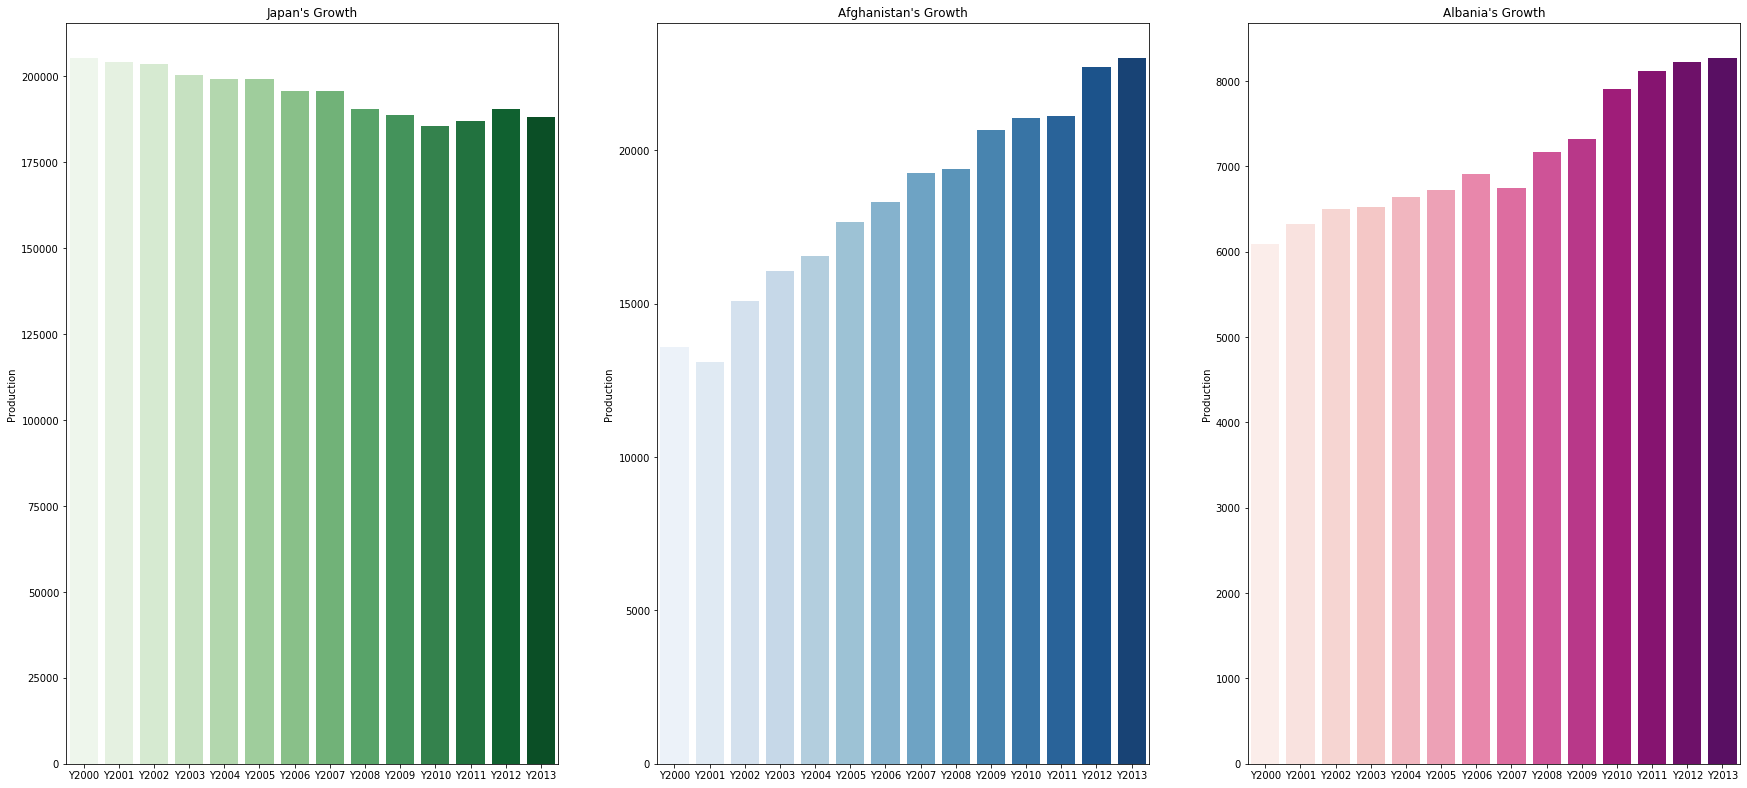

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)
# looking at Japan's Growth
japan_production = pd.DataFrame(data[data['Area'] == 'Japan'].loc[:, "Y2000": "Y2013"].agg("sum", axis = 0))

japan_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = japan_production.index, y = japan_production.Production, data = japan_production, palette = 'Greens')
plt.gca().set_title("Japan's Growth")

# looking at Afghanistan's growth
afg_production = pd.DataFrame(data[data['Area'] == 'Afghanistan'].loc[:, "Y2000":"Y2013"].agg("sum", axis = 0))

afg_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = afg_production.index, y = afg_production.Production, data = afg_production, palette = 'Blues')
plt.gca().set_title("Afghanistan's Growth")

#looking at albania's growth
albania_production = pd.DataFrame(data[data['Area'] == 'Albania'].loc[:,"Y2000":"Y2013"].agg("sum", axis = 0))

albania_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = albania_production.index, y = albania_production.Production, data = albania_production, palette = 'RdPu')
plt.gca().set_title("Albania's Growth")


# MOST PRODUCED ITEMS

In [22]:
items = pd.DataFrame(data.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:20]
items

,Element
Item,
Milk - Excluding Butter,450
Eggs,298
Cereals - Excluding Beer,291
"Fish, Seafood",283
Maize and products,278
Pelagic Fish,275
Oilcrops,259
Starchy Roots,255
"Cereals, Other",255


# LEAST PRODUCED ITEMS

In [23]:
items = pd.DataFrame(data.groupby("Item")["Element"].agg("count").sort_values(ascending=True))[:20]
items

,Element
Item,
"Meat, Aquatic Mammals",3
Cottonseed,14
Ricebran Oil,17
Palm kernels,20
Sugar non-centrifugal,32
Sugar beet,46
Sunflower seed,81
Yams,84
Sugar cane,84


# ANALYSIS OF ITEM PRODUCTION (LARGEST PRODUCER OF THE ITEM) 

### ANALYSIS OF RICE PRODUCTION

In [24]:
data_rice = data[data.Item == 'Rice (Milled Equivalent)']
rice_area = data_rice.groupby(['Area'])['Y2000'].sum()
rice_area.sort_values(ascending=False)[:20]

Area
China, mainland                          114032.0
India                                     77388.0
Indonesia                                 28707.0
Bangladesh                                22455.0
Viet Nam                                  14469.0
Myanmar                                   10150.0
Philippines                                8468.0
Thailand                                   8342.0
Japan                                      7640.0
Brazil                                     6672.0
Republic of Korea                          4043.0
Egypt                                      2804.0
Nigeria                                    2699.0
Nepal                                      2275.0
Iran (Islamic Republic of)                 2181.0
Cambodia                                   2101.0
Malaysia                                   2015.0
United States of America                   2007.0
Pakistan                                   1998.0
Democratic People's Republic of Korea      18

Text(0.5, 1.0, 'TOP 10 PRODUCERS OF RICE')

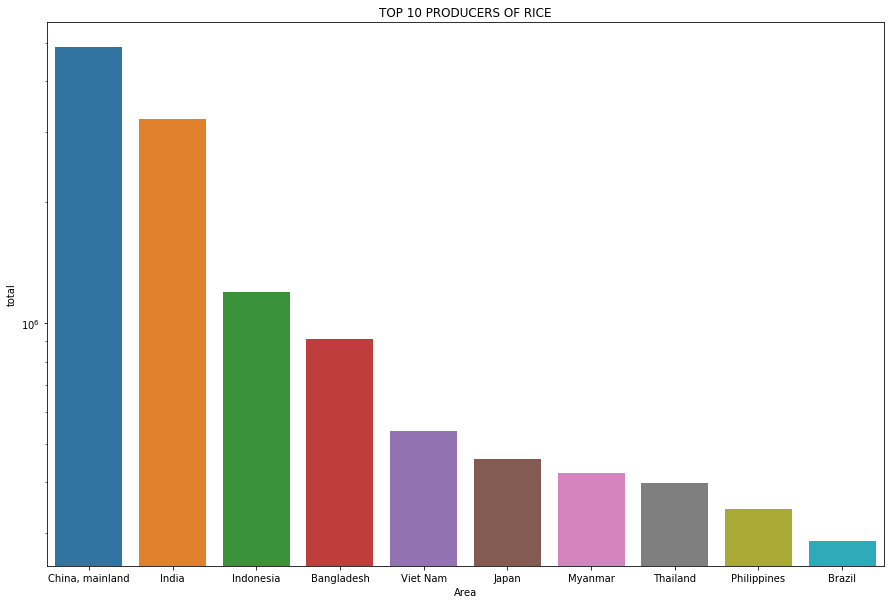

In [25]:
df = data_rice.groupby(by='Area')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.Area, df.total,errwidth=1)
plt.yscale('log')
plt.title("TOP 10 PRODUCERS OF RICE")

##### LEAST 10 PRODUCERS OF RICE

In [26]:
rice_area = data_rice.groupby(['Area'])['Y2000'].sum()
rice_area.sort_values(ascending=True)[2:20]

Area
Saint Lucia                         1.0
Saint Kitts and Nevis               1.0
Antigua and Barbuda                 1.0
Iceland                             1.0
Dominica                            1.0
Malta                               2.0
Saint Vincent and the Grenadines    3.0
Cyprus                              4.0
Kiribati                            4.0
Sao Tome and Principe               4.0
Samoa                               4.0
Barbados                            4.0
New Caledonia                       5.0
Namibia                             6.0
Belize                              7.0
Bahamas                             7.0
French Polynesia                    8.0
Rwanda                              9.0
Name: Y2000, dtype: float64

#### Comparing Rice production in India and Brazil because Brazil consumes lot of rice and India produces it helping exports of he country...any other crop analysis can be don

### INDIA'S PRODUCTION OF RICE

In [27]:
india_rice= data[(data.Item == 'Rice (Milled Equivalent)') & (data.Area == 'India') ]
india_rice

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
9035,IND,100,India,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,20.59,78.96,...,1837.0,1856.0,1929.0,1975.0,1810.0,1920.0,2106.0,2105,2124,49479.0
9036,IND,100,India,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,20.59,78.96,...,80672.0,80897.0,82527.0,84858.0,85325.0,86928.0,86478.0,86933,87006,3170975.0


### BRAZIL'S PRODUCTION OF RICE

In [28]:
brazil_rice= data[(data.Item == 'Rice (Milled Equivalent)') & (data.Area == 'Brazil') ]
brazil_rice

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
2535,BRA,21,Brazil,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-14.24,-51.93,...,7305.0,6519.0,6319.0,6379.0,6688.0,6546.0,6727.0,6309,6437,285676.0


###  ANALYSIS OF EGGS PRODUCTION

In [29]:
data_eggs = data[data.Item == 'Eggs']
eggs_area = data_eggs.groupby(['Area'])['total'].sum()
eggs_area.sort_values(ascending=False)[:20]

Area
China, mainland               1106654.0
United States of America       408124.0
Japan                          221044.0
Germany                        122062.0
India                          120392.0
Mexico                         103214.0
Brazil                          98662.0
France                          84134.0
United Kingdom                  75284.0
Italy                           69910.0
Spain                           57308.0
Thailand                        50940.0
Indonesia                       47068.0
Poland                          41450.0
Turkey                          37246.0
Canada                          35048.0
Republic of Korea               33570.0
Iran (Islamic Republic of)      31556.0
Nigeria                         30252.0
Argentina                       26952.0
Name: total, dtype: float64

Text(0.5, 1.0, 'TOP 10 PRODUCERS OF EGGS')

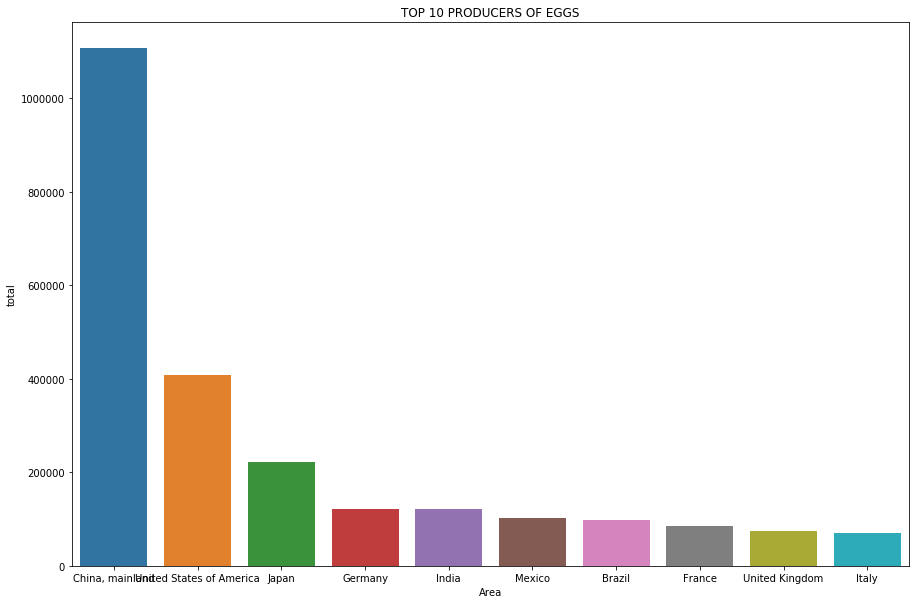

In [30]:
df = data_eggs.groupby(by='Area')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.Area, df.total,errwidth=2)
plt.yscale('linear')
plt.title("TOP 10 PRODUCERS OF EGGS")

### ANALYSIS OF WHEAT PRODUCTION 

In [31]:
data_wheat = data[data.Item == 'Wheat and products']
wheat_area = data_wheat.groupby(['Area'])['total'].sum()
wheat_area.sort_values(ascending=False)[:20]

Area
China, mainland               3789747.0
India                         2395350.0
United States of America      1337203.0
Pakistan                       682977.0
Germany                        666284.0
France                         651621.0
Turkey                         618851.0
United Kingdom                 537952.0
Italy                          530104.0
Iran (Islamic Republic of)     464865.0
Egypt                          449029.0
Poland                         373984.0
Brazil                         359295.0
Spain                          316034.0
Japan                          299967.0
Canada                         266662.0
Algeria                        230227.0
Romania                        223294.0
Morocco                        215189.0
Argentina                      191616.0
Name: total, dtype: float64

Text(0.5, 1.0, 'TOP 10 PRODUCERS OF WHEAT')

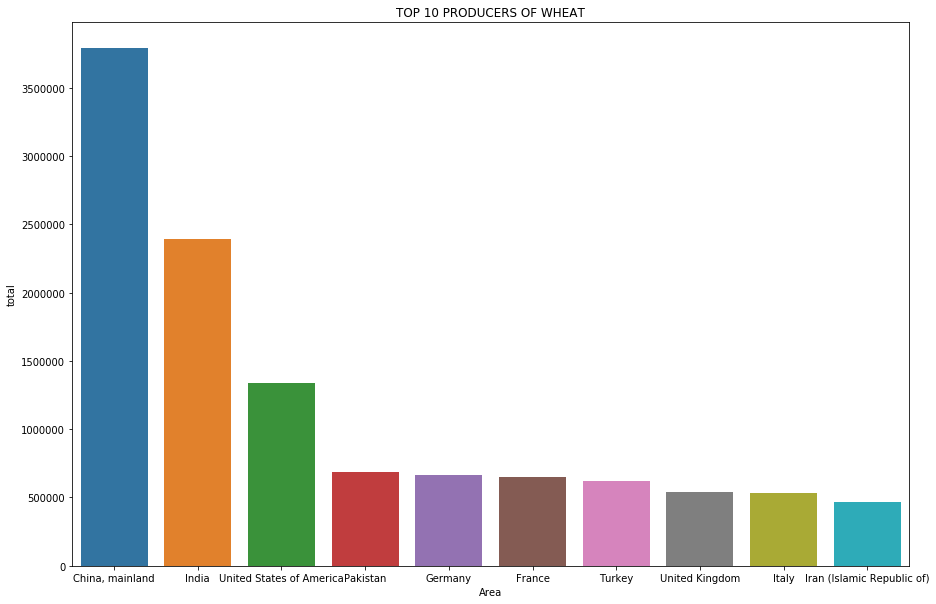

In [32]:
df = data_wheat.groupby(by='Area')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.Area, df.total,errwidth=2)
plt.yscale('linear')
plt.title("TOP 10 PRODUCERS OF WHEAT")

### ALCOHOL PRODUCTION

Text(0.5, 1.0, 'TOP 10 PRODUCERS OF ALCOHOL')

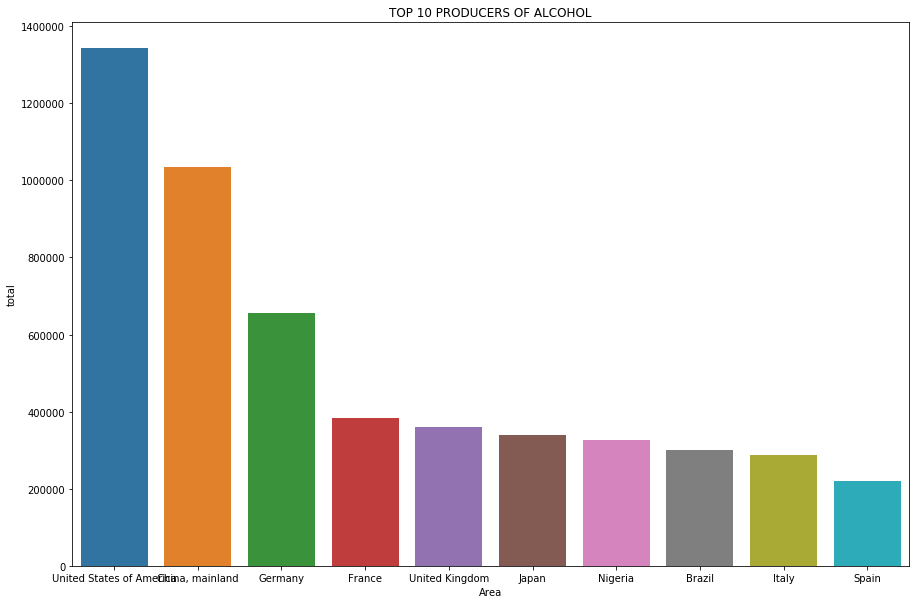

In [33]:
data_alc = data[data.Item == 'Alcoholic Beverages'] 
df = data_alc.groupby(by='Area')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.Area, df.total,errwidth=2)
plt.yscale('linear')
plt.title("TOP 10 PRODUCERS OF ALCOHOL")

#  COUNTRY WISE PRODUCTION ANALYSIS

## PRODUCTION IN INDIA

In [34]:
data_ind = data[data.Area == 'India']
ind_data = data_ind.groupby(['Item'])['total'].sum()
ind_data.sort_values(ascending=False)[:20]

Item
Cereals - Excluding Beer      7054151.0
Milk - Excluding Butter       5913552.0
Rice (Milled Equivalent)      3220454.0
Vegetables                    2572232.0
Wheat and products            2395350.0
Vegetables, Other             2116819.0
Fruits - Excluding Wine       1549199.0
Starchy Roots                  976248.0
Sugar & Sweeteners             963271.0
Fruits, Other                  832861.0
Pulses                         661514.0
Sugar Crops                    642680.0
Sugar cane                     642680.0
Potatoes and products          615605.0
Sugar (Raw Equivalent)         612956.0
Millet and products            479813.0
Pulses, Other and products     466690.0
Sorghum and products           450934.0
Bananas                        431363.0
Maize and products             416909.0
Name: total, dtype: float64

Text(0.5, 1.0, "INDIA'S OVERALL PRODUCTION")

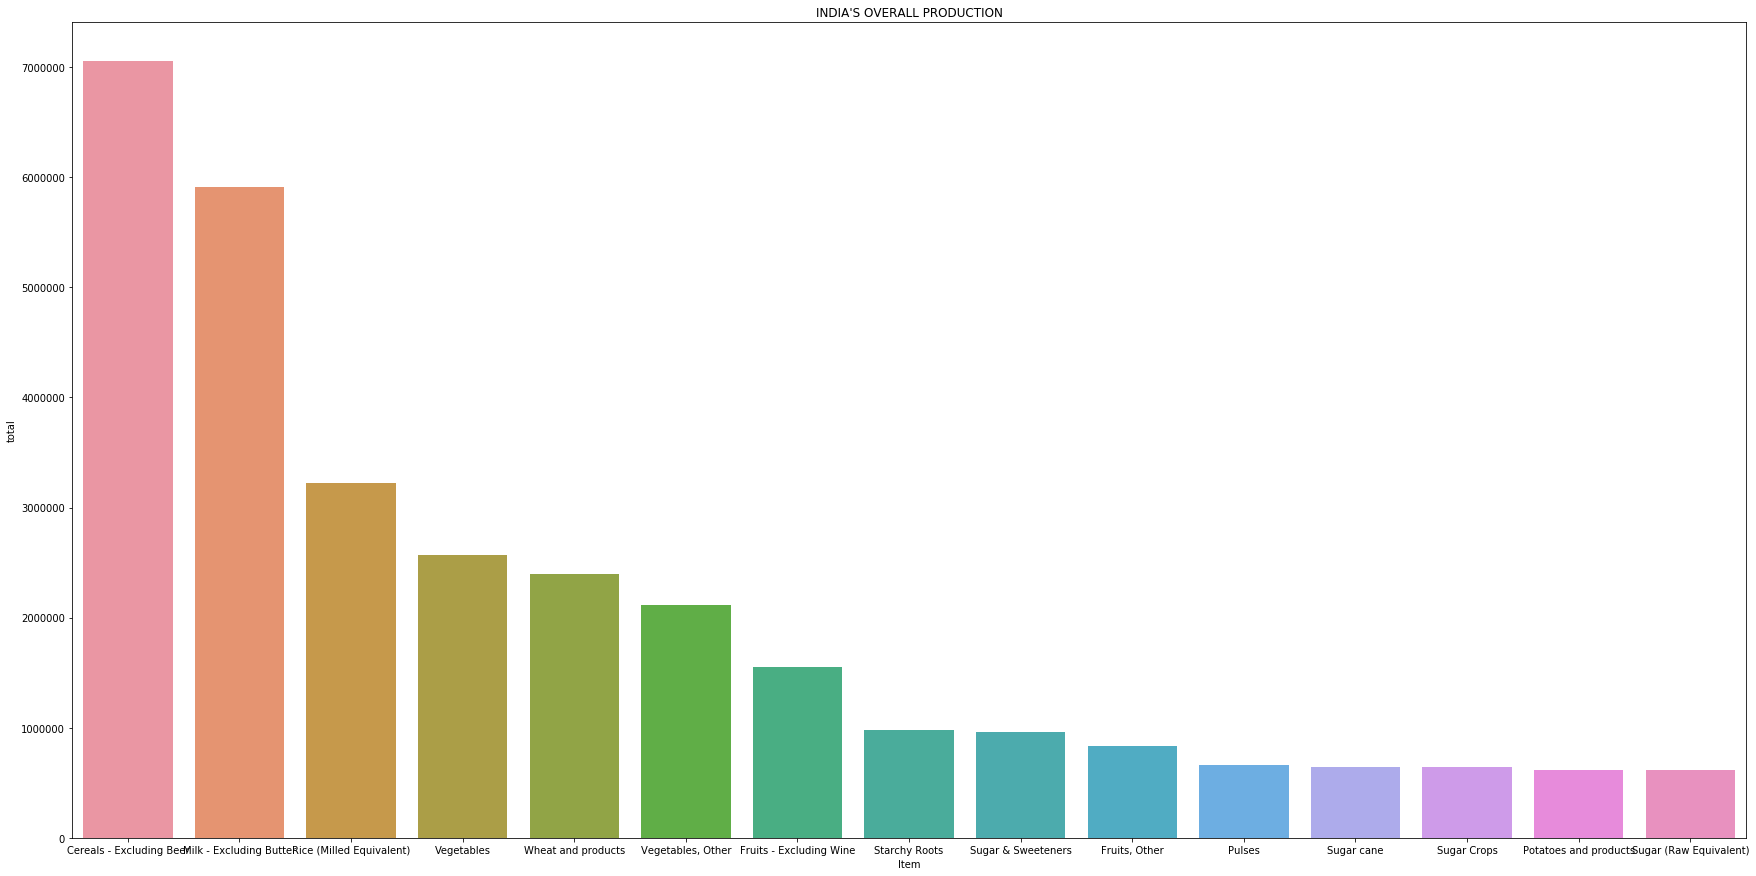

In [35]:
df = data_ind.groupby(by='Item')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(df.Item, df.total,errwidth=2)
plt.yscale('linear')
plt.title("INDIA'S OVERALL PRODUCTION")

## PRODUCTION IN NAMIBIA

In [36]:
data_nmb = data[data.Area == 'Namibia']
nmb_data = data_nmb.groupby(['Item'])['total'].sum()
nmb_data.sort_values(ascending=False)[:20]

Item
Milk - Excluding Butter     10366.0
Starchy Roots               10109.0
Roots, Other                 9634.0
Cereals - Excluding Beer     9189.0
Maize and products           4011.0
Fish, Seafood                2744.0
Meat                         2341.0
Fruits - Excluding Wine      2247.0
Alcoholic Beverages          2197.0
Wheat and products           2168.0
Pelagic Fish                 2111.0
Millet and products          2019.0
Sugar & Sweeteners           2008.0
Sugar (Raw Equivalent)       1972.0
Beer                         1839.0
Vegetables                   1742.0
Fruits, Other                1586.0
Vegetables, Other            1343.0
Bovine Meat                   783.0
Mutton & Goat Meat            692.0
Name: total, dtype: float64

Text(0.5, 1.0, "NAMIBIA'S OVERALL PRODUCTION")

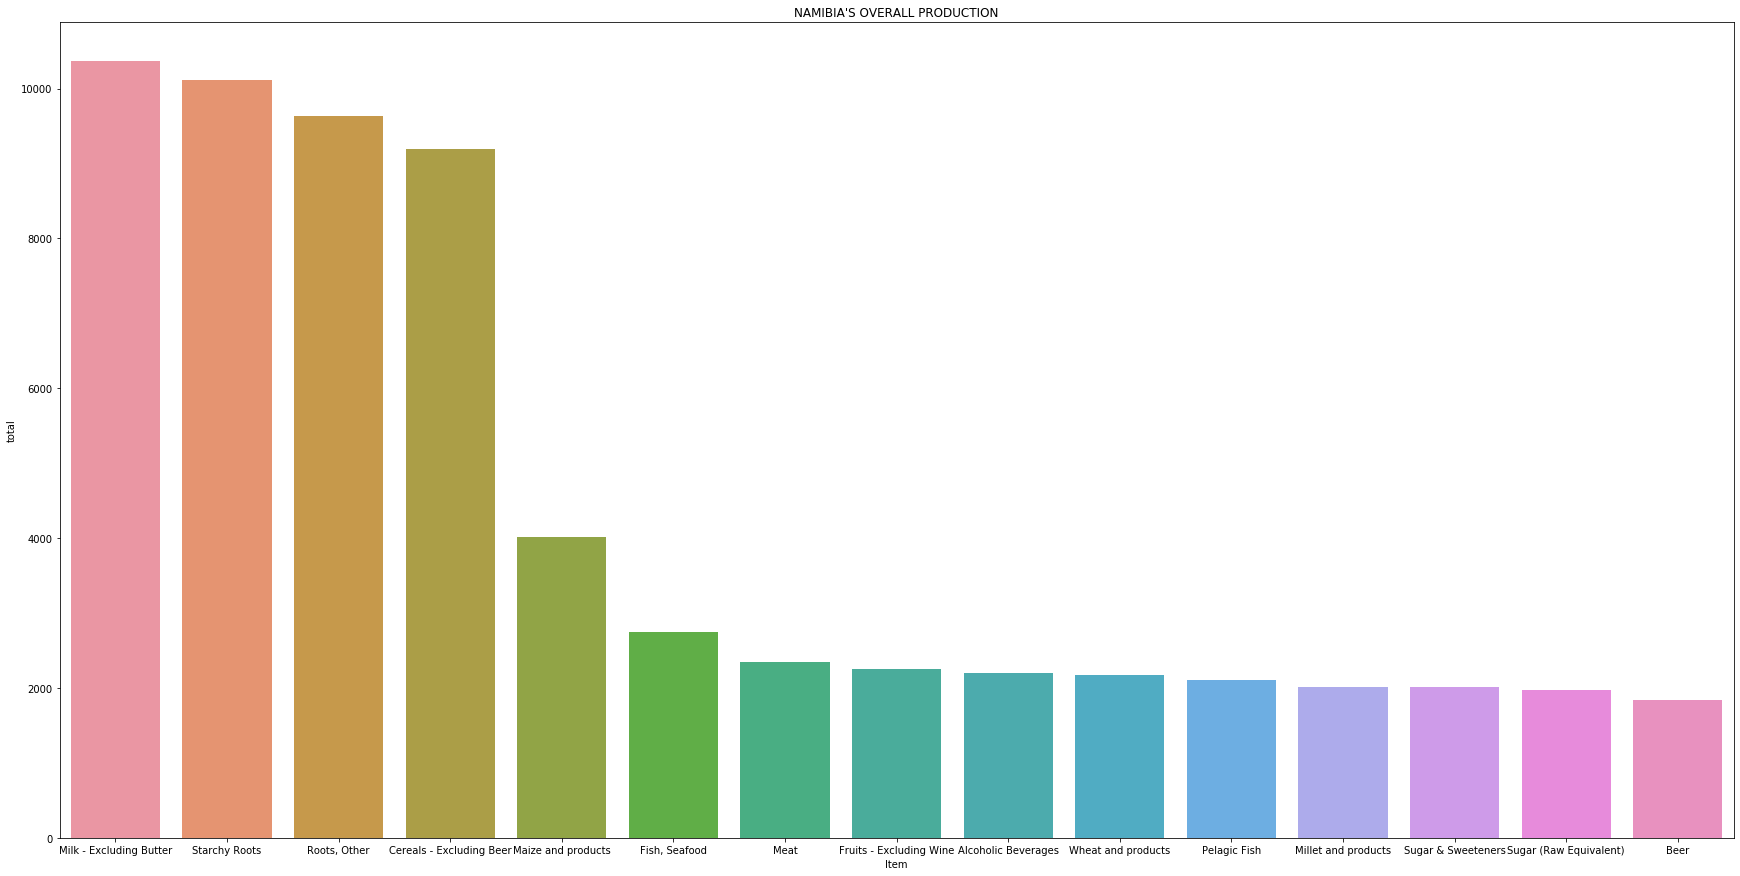

In [37]:
df = data_nmb.groupby(by='Item')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(df.Item, df.total,errwidth=2)
plt.yscale('linear')
plt.title("NAMIBIA'S OVERALL PRODUCTION")

#  YEAR WISE PRODUCTION ANALYSIS

### PRODUCTION IN 1961

In [38]:
data_yr = data[['Area','Item','Y1961']]
y1961_data = data_yr.groupby(['Item'])['Y1961'].sum()
y1961_data.sort_values(ascending=False)[:20]

Item
Cereals - Excluding Beer    588894.0
Milk - Excluding Butter     500986.0
Starchy Roots               282832.0
Vegetables                  179658.0
Maize and products          168039.0
Vegetables, Other           147094.0
Wheat and products          138829.0
Potatoes and products       129648.0
Rice (Milled Equivalent)    122700.0
Fruits - Excluding Wine     109963.0
Sweet potatoes               90049.0
Alcoholic Beverages          69924.0
Meat                         59002.0
Cassava and products         53409.0
Sugar & Sweeteners           52390.0
Barley and products          46180.0
Fruits, Other                40040.0
Sugar (Raw Equivalent)       39977.0
Beer                         37589.0
Oats                         35770.0
Name: Y1961, dtype: float64

Text(0.5, 1.0, "1961'S OVERALL PRODUCTION")

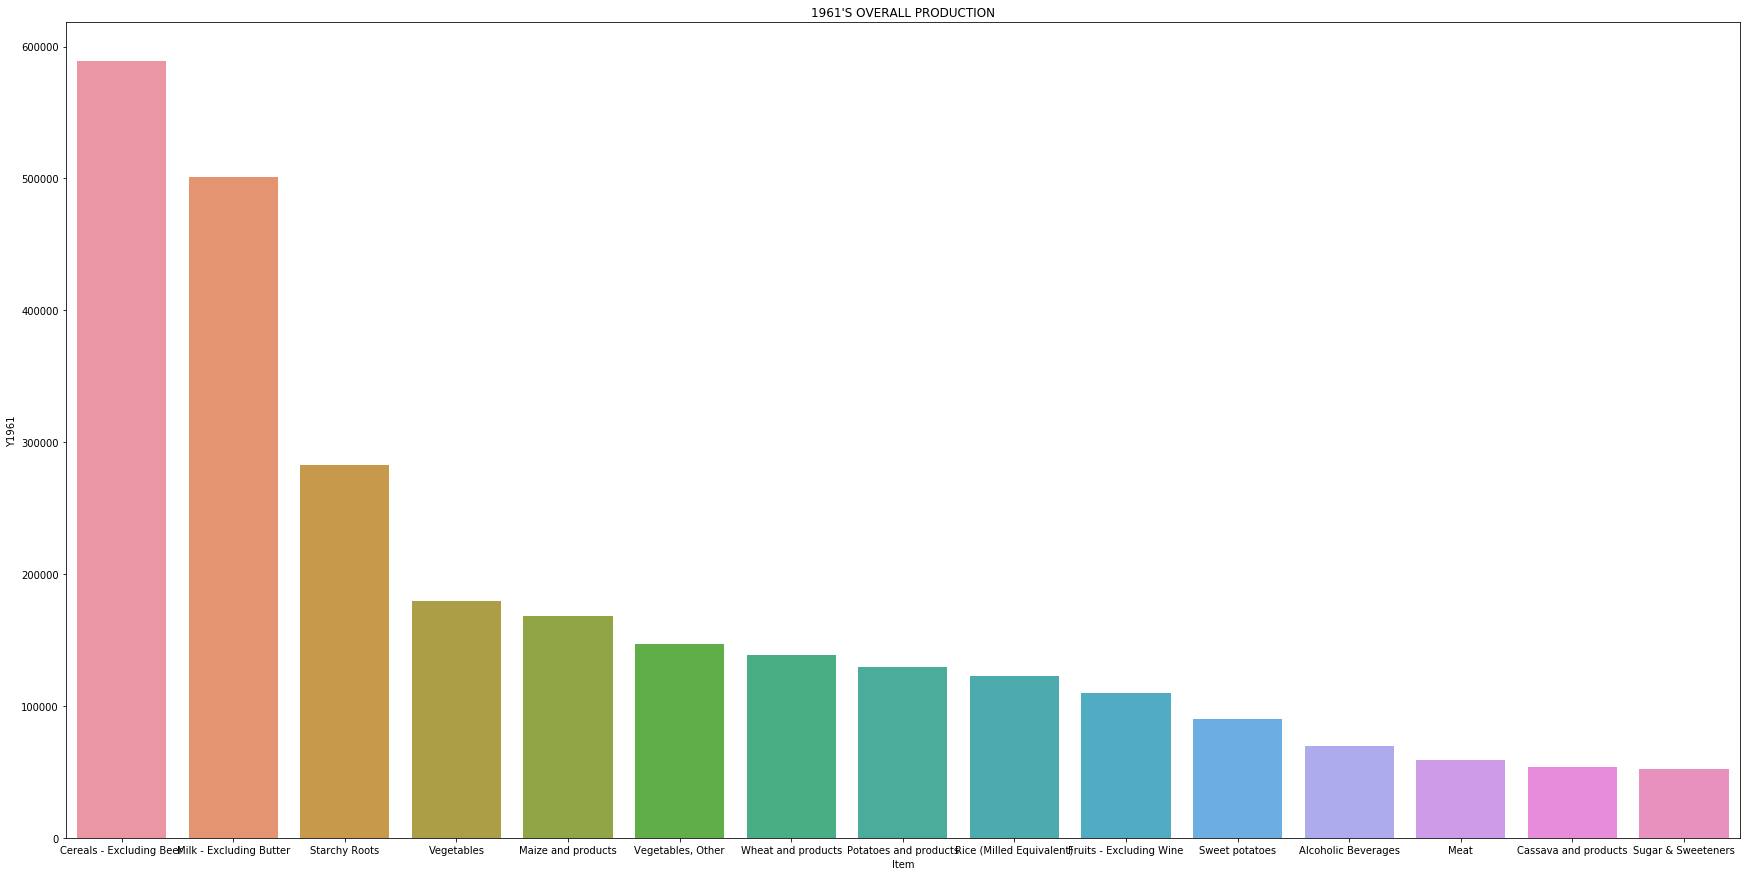

In [39]:
df = data_yr.groupby(by='Item')['Y1961'].sum().reset_index().sort_values(by='Y1961', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(df.Item, df.Y1961,errwidth=2)
plt.yscale('linear')
plt.title("1961'S OVERALL PRODUCTION")

### PRODUCTION IN 1998

In [40]:
data_yr = data[['Area','Item','Y1998']]
yr1998_data = data_yr.groupby(['Item'])['Y1998'].sum()
yr1998_data.sort_values(ascending=False)[:20]

Item
Cereals - Excluding Beer    1432323.0
Milk - Excluding Butter      885046.0
Vegetables                   551900.0
Maize and products           462343.0
Starchy Roots                453604.0
Wheat and products           439071.0
Vegetables, Other            437695.0
Rice (Milled Equivalent)     335789.0
Fruits - Excluding Wine      328184.0
Meat                         196616.0
Potatoes and products        181593.0
Alcoholic Beverages          175652.0
Sugar & Sweeteners           133041.0
Sweet potatoes               124999.0
Cassava and products         117687.0
Beer                         117655.0
Fish, Seafood                106247.0
Sugar (Raw Equivalent)       105562.0
Fruits, Other                 98980.0
Eggs                          84188.0
Name: Y1998, dtype: float64

Text(0.5, 1.0, "1998'S OVERALL PRODUCTION")

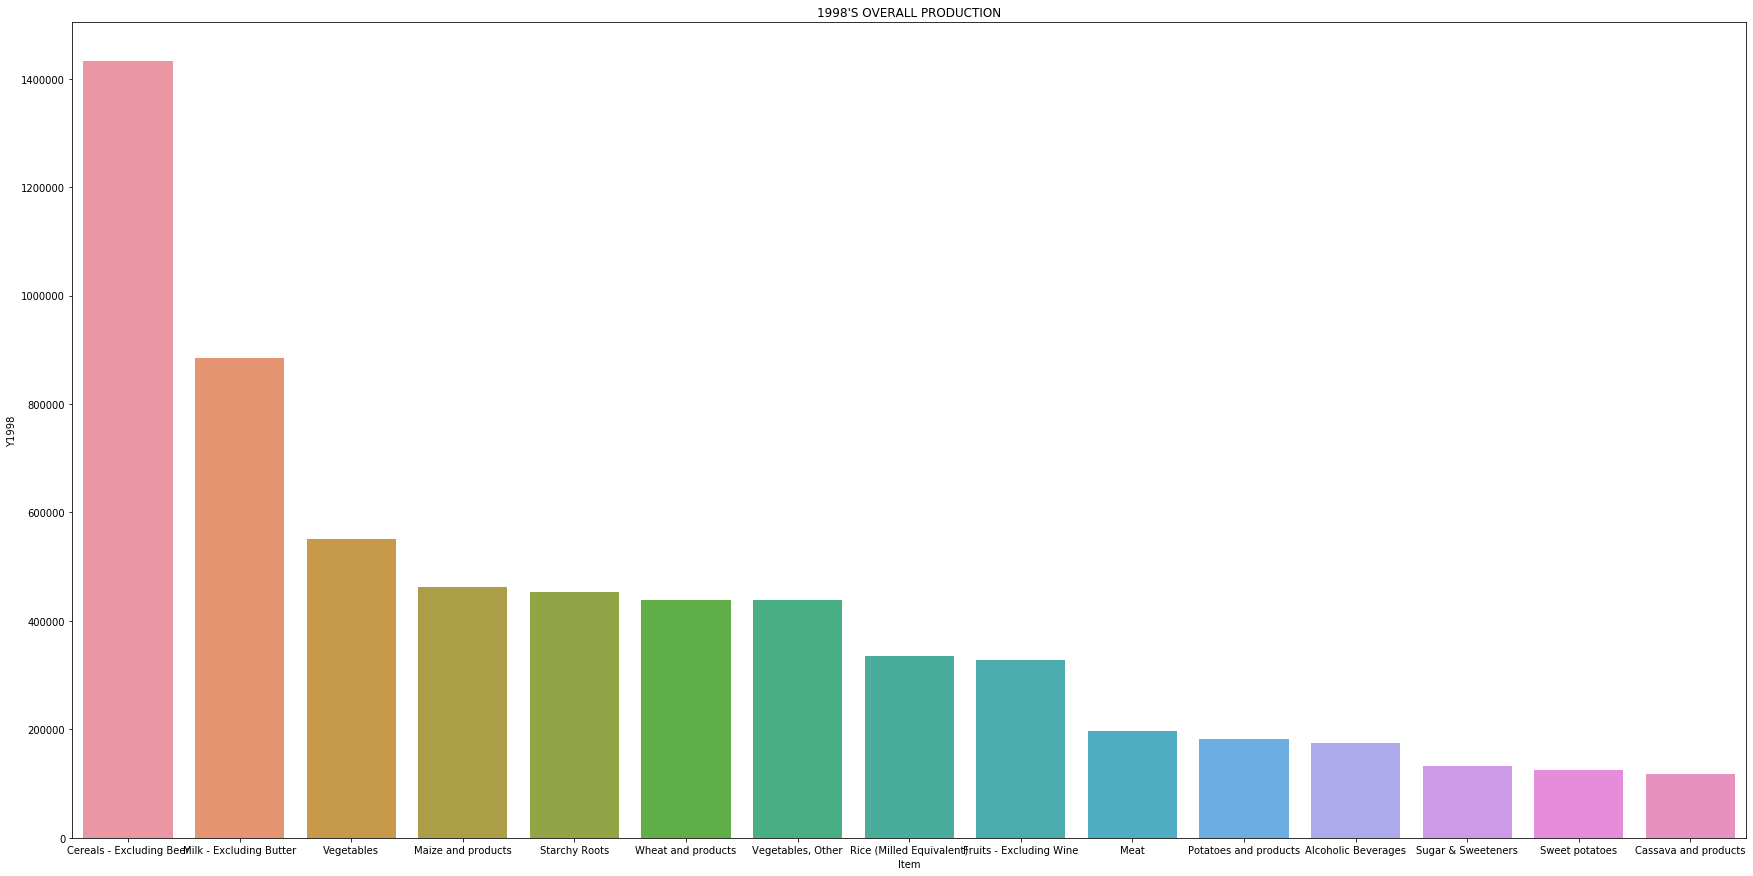

In [41]:
df = data_yr.groupby(by='Item')['Y1998'].sum().reset_index().sort_values(by='Y1998', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(df.Item, df.Y1998,errwidth=2)
plt.yscale('linear')
plt.title("1998'S OVERALL PRODUCTION")

### PRODUCTION IN 2013

In [42]:
data_yr = data[['Area','Item','Y2013']]
yr1998_data = data_yr.groupby(['Item'])['Y2013'].sum()
yr1998_data.sort_values(ascending=False)[:20]

Item
Cereals - Excluding Beer    1745653
Milk - Excluding Butter     1238802
Vegetables                   971615
Vegetables, Other            768458
Maize and products           632847
Starchy Roots                557021
Fruits - Excluding Wine      517523
Wheat and products           515473
Rice (Milled Equivalent)     408832
Meat                         279446
Alcoholic Beverages          235274
Potatoes and products        232169
Cassava and products         187657
Fruits, Other                175170
Beer                         168181
Sugar & Sweeteners           157930
Fish, Seafood                149030
Tomatoes and products        133468
Sugar (Raw Equivalent)       129958
Eggs                         119808
Name: Y2013, dtype: int64

Text(0.5, 1.0, "2013'S OVERALL PRODUCTION")

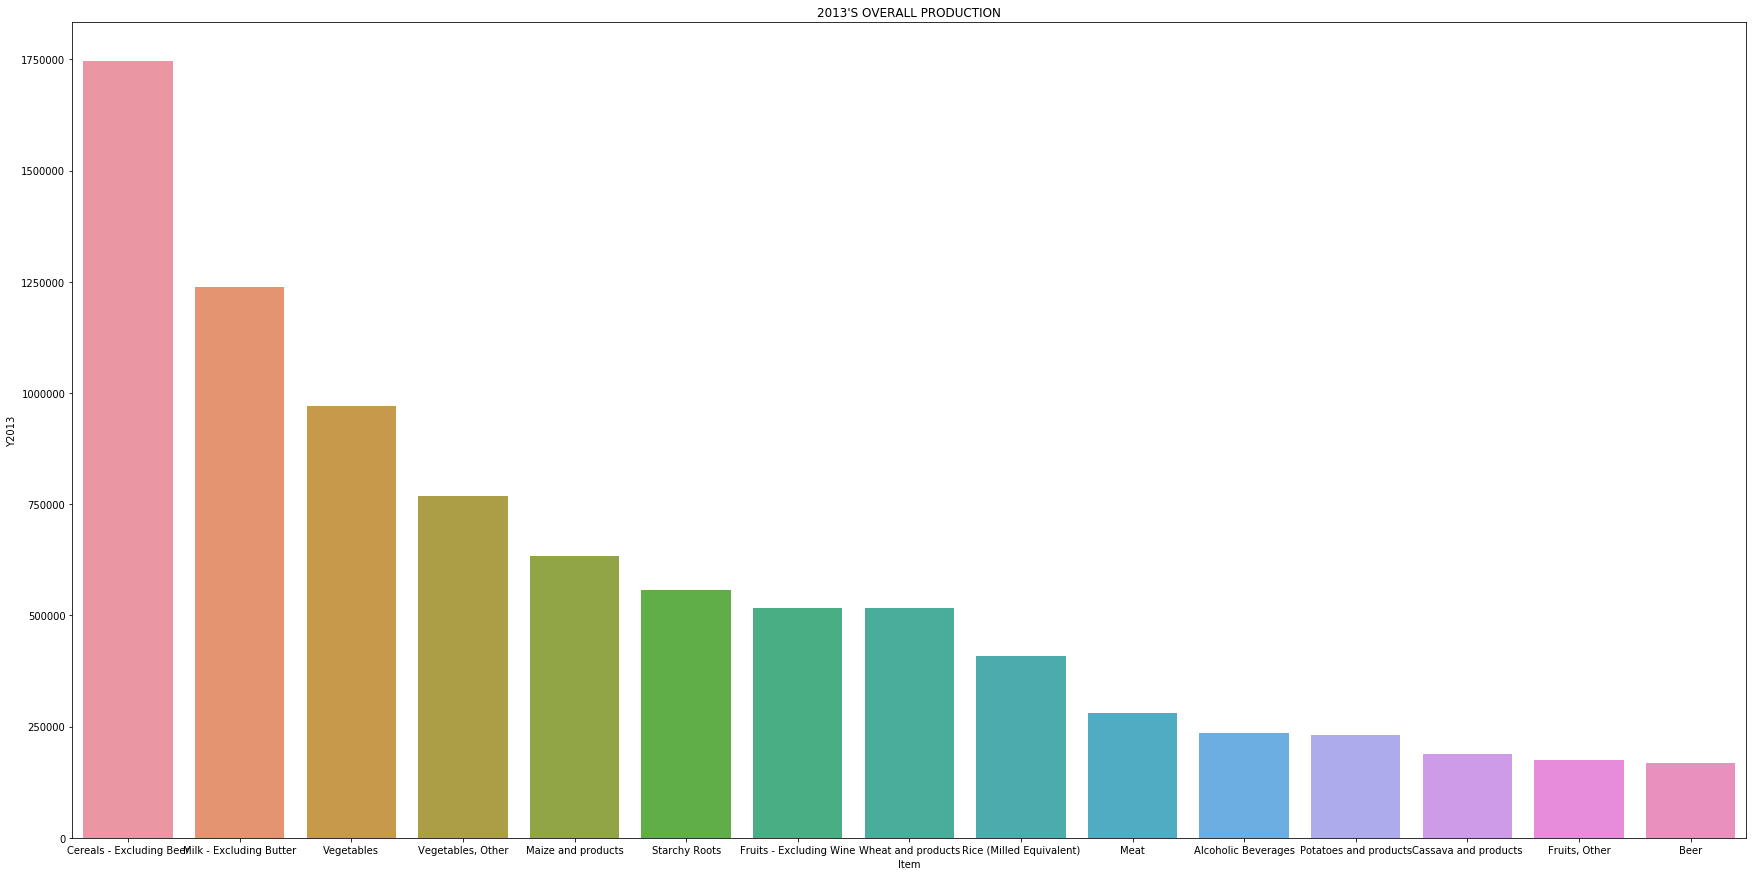

In [43]:
df = data_yr.groupby(by='Item')['Y2013'].sum().reset_index().sort_values(by='Y2013', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(df.Item, df.Y2013,errwidth=2)
plt.yscale('linear')
plt.title("2013'S OVERALL PRODUCTION")